In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('states_all.csv')


In [3]:
df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [5]:
df_polate=df.interpolate()

In [7]:
#burada interpolatein hala doldurmadığı değerler olması ilk değerlerin olmamasından mı? 
#Hani bir önce bir sonraya bakıyor ama bakınca değer bulamıyor ki değerlendirsin(?)
df_polate.isnull().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
GRADES_PK_G                      0
GRADES_KG_G                      0
GRADES_4_G                       0
GRADES_8_G                       0
GRADES_12_G                      0
GRADES_1_8_G                     0
GRADES_9_12_G                    0
GRADES_ALL_G                     0
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE              0
AVG_READING_8_SCORE              1
dtype: int64

In [8]:
df_new=df_polate.dropna()

In [9]:
df_new.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

In [10]:
#soru1
df_new['agirlikli_math_not']=(df_new['AVG_MATH_4_SCORE']*df_new['GRADES_4_G']+df_new['AVG_MATH_8_SCORE']*df_new['GRADES_8_G'])/(df_new['GRADES_4_G']+df_new['GRADES_8_G'])

In [11]:
df_new['agirlikli_reading_not']=(df_new['AVG_READING_4_SCORE']*df_new['GRADES_4_G']+df_new['AVG_READING_8_SCORE']*df_new['GRADES_8_G'])/(df_new['GRADES_4_G']+df_new['GRADES_8_G'])

In [12]:
df_new.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,agirlikli_math_not,agirlikli_reading_not
51,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,39900.0,470775.0,198651.0,677690.0,225.288432,274.960042,221.118901,261.722130,250.654133,241.853671
52,1993_ALASKA,ALASKA,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,...,6975.0,80485.0,32347.0,115619.0,225.199272,274.840008,221.052247,261.712681,248.739816,240.334168
53,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,37614.0,461398.0,182737.0,647299.0,225.110112,274.719975,220.985592,261.703232,248.977952,240.575288
54,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,27169.0,280280.0,125801.0,407329.0,225.020952,274.599941,220.918938,261.693783,250.587155,241.945143
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,277271.0,3328627.0,1393530.0,4782111.0,224.931792,274.479907,220.852284,261.684334,248.467543,240.247834


In [13]:
#soru2
#burada bütün sürekli değişkenlerin korelasyonlarının tablosu görülüyor.
df_new.corr()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,agirlikli_math_not,agirlikli_reading_not
YEAR,1.000000,-0.005530,0.168259,0.205281,0.156171,0.160285,0.162501,0.161287,0.176804,0.136985,...,-0.005848,-0.072166,-0.040110,-0.039541,0.757863,0.593457,0.450771,0.402213,0.692291,0.534247
ENROLL,-0.005530,1.000000,0.918050,0.897865,0.916886,0.855716,0.918856,0.887283,0.921936,0.956273,...,0.947991,0.960257,0.959204,0.945461,-0.042151,-0.011235,-0.056353,0.040199,-0.022881,0.000494
TOTAL_REVENUE,0.168259,0.918050,1.000000,0.931450,0.973772,0.966881,0.999067,0.990802,0.995063,0.949614,...,0.880596,0.845843,0.869776,0.836454,0.132234,0.122117,0.073212,0.107690,0.136492,0.128363
FEDERAL_REVENUE,0.205281,0.897865,0.931450,1.000000,0.924035,0.855923,0.931788,0.898342,0.934732,0.949254,...,0.883284,0.837655,0.863728,0.830773,0.151014,0.121709,0.043680,0.127225,0.146013,0.119049
STATE_REVENUE,0.156171,0.916886,0.973772,0.924035,1.000000,0.885958,0.971316,0.956284,0.969871,0.951916,...,0.883730,0.845559,0.870624,0.831689,0.119744,0.108145,0.049803,0.093622,0.122379,0.103375
LOCAL_REVENUE,0.160285,0.855716,0.966881,0.855923,0.885958,1.000000,0.967282,0.971672,0.959554,0.877338,...,0.811939,0.785449,0.806034,0.780733,0.131121,0.127235,0.097486,0.109814,0.138625,0.145946
TOTAL_EXPENDITURE,0.162501,0.918856,0.999067,0.931788,0.971316,0.967282,1.000000,0.991712,0.993579,0.948700,...,0.882880,0.848987,0.872847,0.840283,0.127461,0.117411,0.067741,0.107277,0.131756,0.124675
INSTRUCTION_EXPENDITURE,0.161287,0.887283,0.990802,0.898342,0.956284,0.971672,0.991712,1.000000,0.977930,0.914349,...,0.849077,0.816897,0.840570,0.808103,0.124482,0.116630,0.076265,0.111536,0.130001,0.133397
SUPPORT_SERVICES_EXPENDITURE,0.176804,0.921936,0.995063,0.934732,0.969871,0.959554,0.993579,0.977930,1.000000,0.955668,...,0.888763,0.850755,0.875650,0.840079,0.139249,0.129075,0.076471,0.114689,0.143923,0.135354
OTHER_EXPENDITURE,0.136985,0.956273,0.949614,0.949254,0.951916,0.877338,0.948700,0.914349,0.955668,1.000000,...,0.916987,0.893138,0.909007,0.878579,0.090049,0.085243,0.027060,0.097835,0.096068,0.092135


In [14]:
#o genis korelasyon tablosunun işimize yarayacak kısmını alıyoruz.
df_new.corr().iloc[7:11,23:25]

,agirlikli_math_not,agirlikli_reading_not
INSTRUCTION_EXPENDITURE,0.130001,0.133397
SUPPORT_SERVICES_EXPENDITURE,0.143923,0.135354
OTHER_EXPENDITURE,0.096068,0.092135
CAPITAL_OUTLAY_EXPENDITURE,0.092261,0.046417


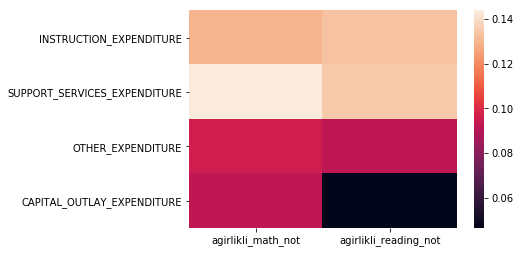

In [15]:
#aynısını bir de görsel olarak yapalım
sns.heatmap(df_new.corr().iloc[7:11,23:25])

In [16]:
#support services expenditure ile math ortalaması en çok ilişkili görünüyor.yine aynı harcamanın reading ortalaması ile ilişkisi 
#sonrasında instruction expenditure her iki ders ile olan ilişkisi geliyor.

In [21]:
#soru3 
#pca doğru mu?

In [17]:
features=['INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']
x = df_new.loc[:, features].values
x = StandardScaler().fit_transform(x)



In [18]:
pca = PCA(n_components=1)


In [19]:
principalComponents = pca.fit_transform(x)


In [20]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])



In [21]:
finalDf = pd.concat([df_new,principalDf], axis=1)


In [22]:
pca.explained_variance_ratio_

array([0.94688927])

In [23]:
#soru4 
finalDf.corr().iloc[23:26,23:26]

,agirlikli_math_not,agirlikli_reading_not,principal component 1
agirlikli_math_not,1.000000,0.742302,0.082580
agirlikli_reading_not,0.742302,1.000000,0.081605
principal component 1,0.082580,0.081605,1.000000


In [24]:
df_new.corr().iloc[7:11,23:25]

,agirlikli_math_not,agirlikli_reading_not
INSTRUCTION_EXPENDITURE,0.130001,0.133397
SUPPORT_SERVICES_EXPENDITURE,0.143923,0.135354
OTHER_EXPENDITURE,0.096068,0.092135
CAPITAL_OUTLAY_EXPENDITURE,0.092261,0.046417


In [ ]:
#soru5

Temel bileşenin seçilmesi mantıklı hem varyansın %94 ünü içeriyor hem de not ortalaması değişkenleriyle harcama kalemlerinden daha fazla korelasyon içeriyor.